
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


  The dataset I am exploring is the TMDb movie dataset, it has information of about 10,000 movies collected from TMD database and it includes user ratings and revenue.
  The columns names in the TMDb movie data are;
 1.   imdb_id:               this shows the movies numbering in the imdb database    
 2.   popularity:            this shows the popularity of the movies      
 3.   budget:                this shows the budget spent on the movies         
 4.   revenue:               this shows the revenue gotten from the movies       
 5.   original_title:        this shows the title of each movie     
 6.   cast:                  this shows the major actors in each movie     
 7.   homepage:              this shows the link to access the movie  
 8.   director:              this shows the director of each movie       
 9.   tagline:               this shows a catch phrase from the movie    
 10.  keywords:              this shows the major words to identify the movies    
 11.  overview:              this shows the a general description of the movies  
 12.  runtime:               this shows the lenght of time of the movies in minutes   
 13.  genres:                this shows the category the movies are classified   
 14.  production_companies:  this shows the company who produced the movie
 15.  release_date:          this shows the day and month the movie was released      
 16.  vote_count:            this shows the vote count ratings by viewers
 17.  vote_average:          this shows the average of the vote ratings by viewers        
 18.  release_year:          this shows the year the movie was released       
 19.  budget_adj:            this shows the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time  
 20.  revenue_adj:           this shows revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time               

### Question(s) for Analysis

1. Which movie has the highest revenue?
2. Which movie has the lowest revenue?
3. Which movie has the highest budget?
4. Which movie has the highest vote average?
5. Does vote average affect revenue?
6. Does release year affect revenue?
7. Is revenue affected by budget? 
8. Is budget affected by release year?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I imported the packages I need to investigate the dataset, which are numpy and pandas for numerical calculation, then seaborn and matplotlib for better visualization of the dataset.

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")

I imported the tmdb movie dataset, to read it

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


I choosed to look at three rows of the dataset to have a quick look through at which columns to drop that will not be useful 

In [4]:
df.shape

(10866, 21)

There are 10866 movies and 11 columns

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This is shows the statistical summary of the dataset. It includes the count, mean, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile, and the maximum values of columns.  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To check if there are columns with missing values in the dataset and also the data type found. The columns with missing values are imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies, while the data types are float, integer, and object.


### Data Cleaning


In [7]:
df.drop(['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

The columns which I felt will not useful in the investigation of the dataset were dropped(deleted)

In [8]:
df.head()

,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,4/1/15,7.3,2015


To view how the dataset looks like after dropping the columns that are not useful 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 933.9+ KB


To check for missing values, and the one to fill with the mean value for those with mean values like intergers

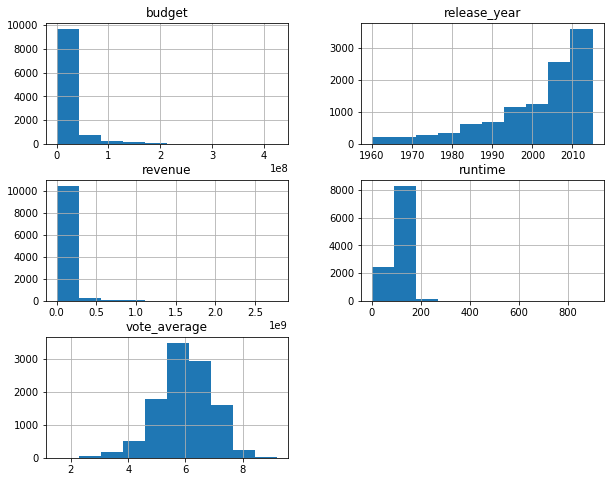

In [10]:
df.hist(figsize=(10,8));

In [11]:
df['budget'].mean() > df['budget'].median() 

True

In [12]:
df['revenue'].mean() > df['revenue'].median() 

True

In [13]:
df['runtime'].mean() > df['runtime'].median() 

True

In [14]:
df['vote_average'].mean() > df['vote_average'].median() 

False

In [15]:
df['release_year'].mean() > df['release_year'].median() 

False

This is to have general view of the data. In, the histogram above; budget, revenue, runtime are right-skewed distribution, and that means there is a positive relationship, that is, the mean is greater than the median. The histogram of vote_average and release_year are left-skewed distribution, and that means there is a negative relationship, that is, the median is greater than the mean.

In [16]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9307 entries, 0 to 10865
Data columns (total 11 columns):
budget            9307 non-null int64
revenue           9307 non-null int64
original_title    9307 non-null object
cast              9307 non-null object
director          9307 non-null object
keywords          9307 non-null object
runtime           9307 non-null int64
genres            9307 non-null object
release_date      9307 non-null object
vote_average      9307 non-null float64
release_year      9307 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 872.5+ KB


The total movies in the dataset are 10866, there where some missing values. I would have been able to fill it with the mean value and bring it up to 10866 for those that have mean values, but I noticed that the column name 'keyword' has 9307 values and it is an object, objects do not have mean values.  I had to drop all the rows in the dataset where keyword is missing.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Questions about the whole dataset)

#### Which movie has the highest revenue?

In [17]:
def min_max(df, col):
    max_ = df[col].idxmax()
    min_ = df[col].idxmin()
    highest = df['original_title'][max_]
    lowest = df['original_title'][min_]
    return highest, lowest

In [18]:
# Movies with the highest revenue
highest_revenue, lowest_revenue = min_max(df, 'revenue')
print(highest_revenue)

Avatar


In [19]:
df.revenue.max() 


2781505847

The movies with the highest grossing revenue is Avatar with $2781505847

#### Which movie has the lowest revenue?

In [20]:
# Movie with the lowest revenue
highest_revenue, lowest_revenue = min_max(df, 'revenue')
print(lowest_revenue)

Wild Card


In [21]:
df.revenue.min()

0

The movie with the lowest revenue is Wild Card with $0

#### Which movie has the highest budget?

In [22]:
# Movie with the highest budget 
highest_budget, lowest_budget = min_max(df, 'budget')
print(highest_budget)

The Warrior's Way


In [23]:
df.budget.max()

425000000

The movie with the highest budget is The Warrior's Way with $425000000 spent 

#### Which movie has the highest vote average?

In [24]:
# Movie with the highest vote average
highest_vote_average, lowest_vote_average = min_max(df, 'vote_average')
print(highest_vote_average)

The Story of Film: An Odyssey


In [25]:
df.vote_average.max()

9.1999999999999993

The movie with the highest vote average is The Story of Film: An Odyssey with 9.2 vote average	

### Research Question 2  (Relationships between some variables)

#### Does vote average affect revenue?

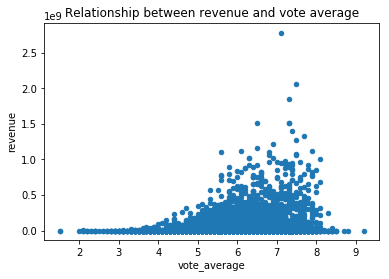

In [26]:
# Relationship between revenue and vote average
df.plot(x='vote_average', y='revenue', kind= 'scatter')
plt.title('Relationship between revenue and vote average')
plt.xlabel('vote_average', size=10)
plt.ylabel('revenue', size=10);

There is no correlation between revenue and vote average

#### Does release year affect revenue?

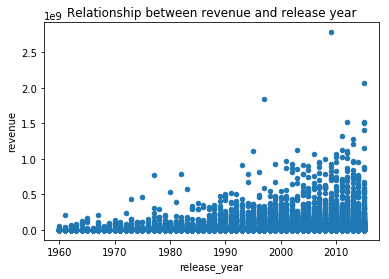

In [27]:
# Relationship between revenue and release year
df.plot(x='release_year', y='revenue', kind= 'scatter')
plt.title('Relationship between revenue and release year')
plt.xlabel('release_year', size=10)
plt.ylabel('revenue', size=10);

The revenue generated from the movies increases over the years

#### Is revenue affected by budget?

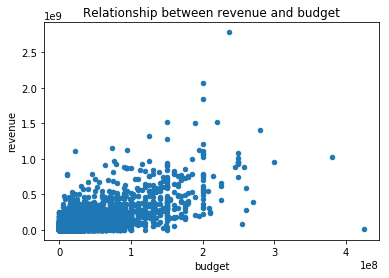

In [28]:
# Relationship between revenue and budget
df.plot(x='budget', y='revenue', kind= 'scatter')
plt.title('Relationship between revenue and budget')
plt.xlabel('budget', size=10)
plt.ylabel('revenue', size=10);

There is a direct proportional relationship. Revenue and budget both increased at a constant rate.

#### Is budget affected by release year?

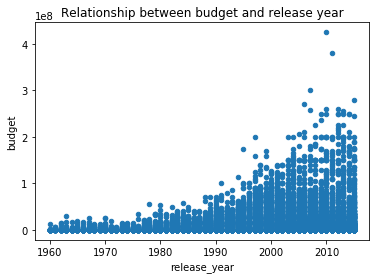

In [29]:
# Relationship between budget and release year
df.plot(x='release_year', y='budget', kind= 'scatter')
plt.title('Relationship between budget and release year')
plt.xlabel('release_year', size=10)
plt.ylabel('budget', size=10);

The budget for movies increases over the years

<a id='conclusions'></a>
## Conclusions

I analysed the TMDb movies dataset. Firstly, I imported the packages I needed to analyse the dataset. Secondly, I cleaned the dataset to make it more better to work with in investigating. Thirdly, I explored the dataset by using the data to answer some questions.
> The movie with the highest grossing revenue is Avatar with $2781505847

> The movie with the lowest revenue is Wild Card with $0

> The movie with the highest budget is The Warrior's Way with $425000000 spent 

> The movie with the highest vote average is The Story of Film: An Odyssey with 9.2 vote average

> There is no correlation between revenue and vote average

> The revenue generated from the movies increases over the years

> There is a direct proportional relationship. Revenue and budget both increased at a constant rate.

> The budget for movies increases over the years

Revenue and budget are very closely related as seen, there is a direct proportional relationship between both. They both have the same growth pattern.

Vote average has no  correlation to revenue. 

Over the years, both revenue and budget increased. This is not surprising that both have the same growth pattern because they are directly proportional. 


### Limitation 
> I dropped all rows with missing values. It would have affect my analysis of the data set, because of missing values

> There was no correlation between revenue and vote average. The increase or decrease in vote average does not appear to be statistically related to the increase or decrease on the revenue that a movie is going to make. I could not anlyse them.



In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0